In [1]:
import anndata
import numpy as np
import seaborn as sns

from scroutines.config_plots import *
from scroutines import basicu

# check data

In [2]:
f = "../../data/jain22_nature_flybrain/scEcRDN.h5ad"
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 5082 × 17562
    obs: 'replicate', 'genotype', 'time', 'condition', 'celltype', 'cell_condition', 'time_condition', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [3]:
f = "../../data/jain22_nature_flybrain/scEcRRNAi.h5ad"
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 6512 × 17561
    obs: 'replicate', 'genotype', 'time', 'condition', 'celltype', 'cell_condition', 'time_condition', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [4]:
f = "../../data/jain22_nature_flybrain/scHr3RNAi.h5ad"
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 5212 × 17561
    obs: 'replicate', 'genotype', 'time', 'condition', 'celltype', 'cell_condition', 'time_condition', 'nCount_RNA', 'nFeature_RNA'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

# check features

In [5]:
f = "../../data/jain22_nature_flybrain/scEcRDN.h5ad"
# f = "../../data/jain22_nature_flybrain/scEcRRNAi.h5ad"
# f = "../../data/jain22_nature_flybrain/scHr3RNAi.h5ad"
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 5082 × 17562
    obs: 'replicate', 'genotype', 'time', 'condition', 'celltype', 'cell_condition', 'time_condition', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [6]:
adata.X

<5082x17562 sparse matrix of type '<class 'numpy.float64'>'
	with 8233871 stored elements in Compressed Sparse Row format>

In [7]:
adata.obs

,replicate,genotype,time,condition,celltype,cell_condition,time_condition,nCount_RNA,nFeature_RNA
rep1_AAACCCAGTACGTACT,rep1,line_348,72hAPF,WT,L2,2,72hAPFWT,5037.0,1642
rep1_AAAGAACCACGCGGTT,rep1,line_383,72hAPF,WT,L2,2,72hAPFWT,16288.0,2880
rep1_AAAGAACGTAACCAGG,rep1,line_383,72hAPF,WT,L1,0,72hAPFWT,9121.0,2194
rep1_AAAGGTAGTAACACGG,rep1,line_348,72hAPF,WT,L2,2,72hAPFWT,13642.0,2673
rep1_AAAGTGAGTGGCTCTG,rep1,line_348,72hAPF,WT,L1,0,72hAPFWT,7995.0,1923
...,...,...,...,...,...,...,...,...,...
rep2_TTGGGTAGTGGTAATA,rep2,line_461,Adult,WT,L1,0,AdultWT,1600.0,822
rep2_TTGGTTTAGCGCCTTG,rep2,line_406,Adult,WT,L5,8,AdultWT,3357.0,1221
rep2_TTTCATGCAAGTGACG,rep2,line_748,Adult,WT,L2,2,AdultWT,8728.0,1972
rep2_TTTGATCTCCAGCAAT,rep2,line_406,Adult,WT,L2,2,AdultWT,8489.0,1921


In [8]:
adata.obs.groupby(['condition', 'time', 'genotype', 'replicate']).size()

condition  time    genotype  replicate
EcRDN      24hAPF  line_235  rep1          27
                             rep2          25
                   line_819  rep1          27
                             rep2          23
           48hAPF  line_129  rep1          98
                             rep2         118
                   line_355  rep1         136
                             rep2         144
                   line_382  rep1         127
                             rep2         126
           72hAPF  line_177  rep1          84
                             rep2          84
                   line_21   rep1          89
                             rep2         108
                   line_790  rep1           1
                             rep2           2
           Adult   line_324  rep1          44
                             rep2          37
                   line_437  rep1          92
                             rep2          94
WT         24hAPF  line_391  rep1        

In [9]:
adata.var

,features
tdTom,tdTom
Nep3,Nep3
tRNA:Pro-CGG-1-1,tRNA:Pro-CGG-1-1
CG9570,CG9570
Or19b,Or19b
...,...
dock,dock
kraken,kraken
CG13949,CG13949
CG13950,CG13950


In [10]:
adata.obs['replicate'].value_counts()

rep2    2630
rep1    2452
Name: replicate, dtype: int64

In [11]:
adata.obs['genotype'].value_counts()

line_897    723
line_441    572
line_28     531
line_348    499
line_383    324
line_355    280
line_382    253
line_129    216
line_21     197
line_406    195
line_437    186
line_177    168
line_395    166
line_589    143
line_391    135
line_805    129
line_461     92
line_748     87
line_324     81
line_235     52
line_819     50
line_790      3
Name: genotype, dtype: int64

In [12]:
adata.obs['time'].value_counts()

48hAPF    2575
72hAPF    1357
Adult      641
24hAPF     509
Name: time, dtype: int64

In [13]:
adata.obs['condition'].value_counts()

WT       3596
EcRDN    1486
Name: condition, dtype: int64

In [14]:
adata.obs['celltype'].value_counts()

L2    1819
L1    1072
L5     978
L4     610
L3     603
Name: celltype, dtype: int64

In [15]:
cov = np.ravel(adata.raw.X.sum(axis=1))
ftr = np.ravel((adata.raw.X>0).sum(axis=1))
cov2 = adata.obs['nCount_RNA'].values
ftr2 = adata.obs['nFeature_RNA'].values
cov2
cov

array([ 5037., 16288.,  9121., ...,  8728.,  8489.,  6294.])

In [16]:
a = adata.X[0].data
b = adata.raw.X[0].data
c = np.log1p(b/(cov[0]/1e4))

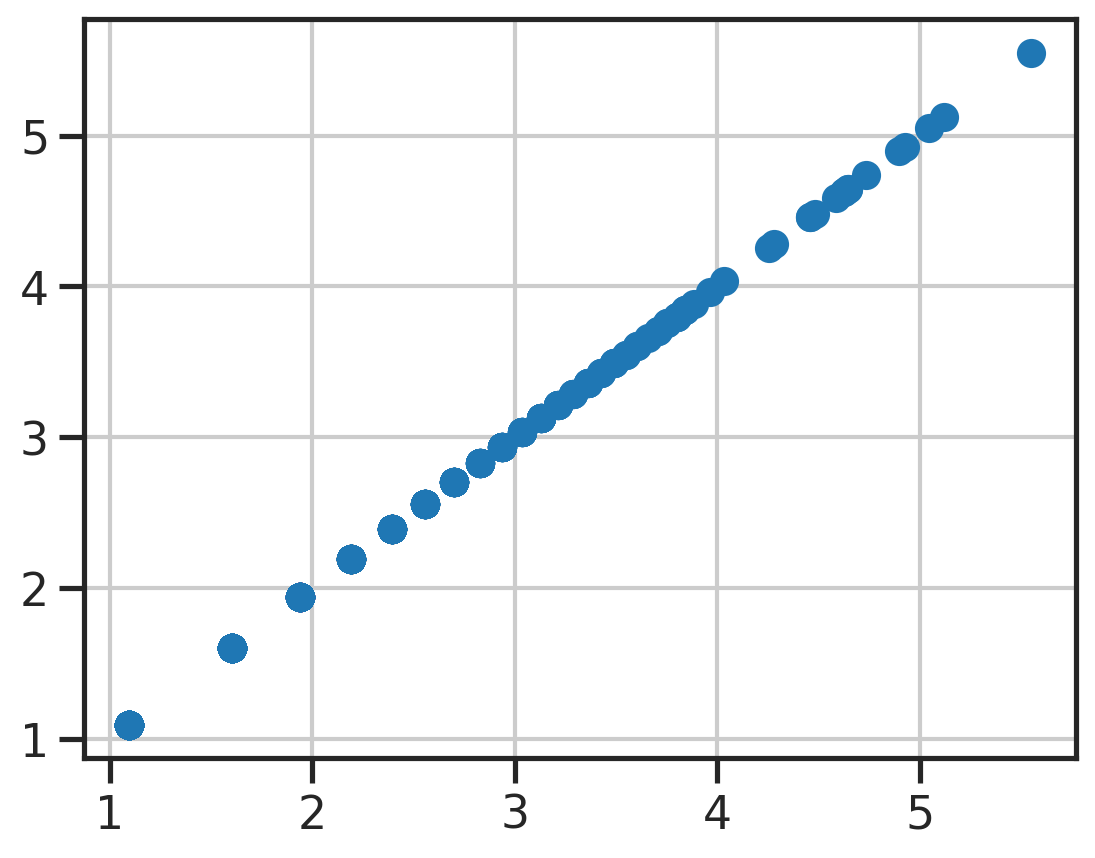

In [17]:
plt.scatter(a, c)

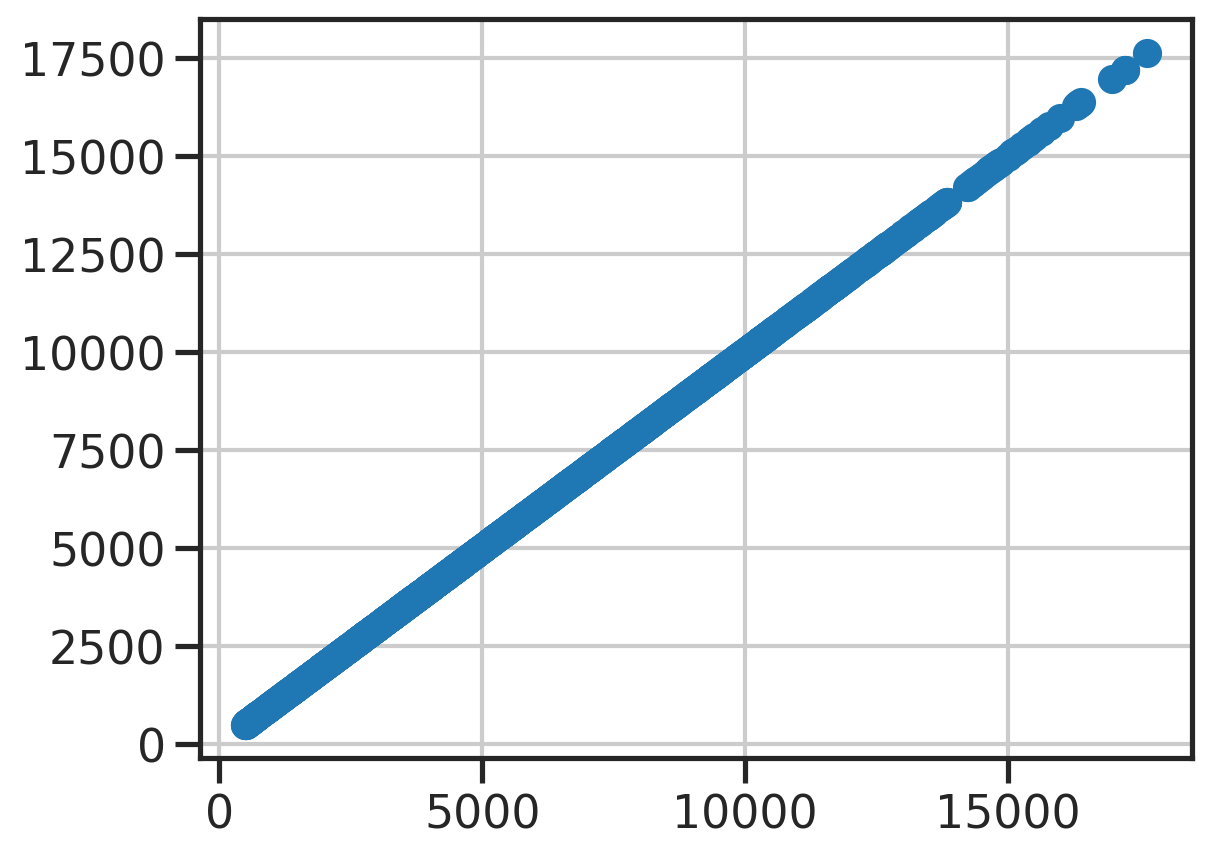

In [18]:
plt.scatter(cov, cov2)

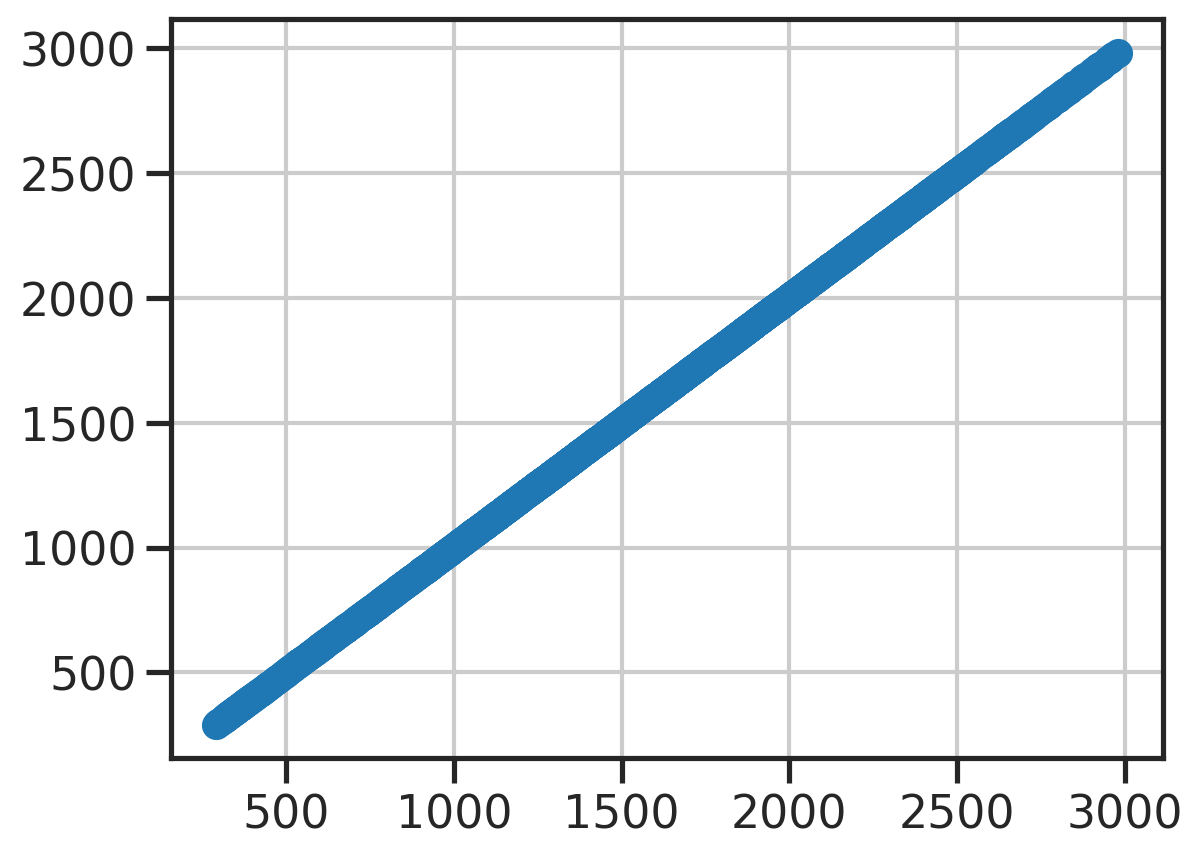

In [19]:
plt.scatter(ftr, ftr2)

<Axes: ylabel='Count'>

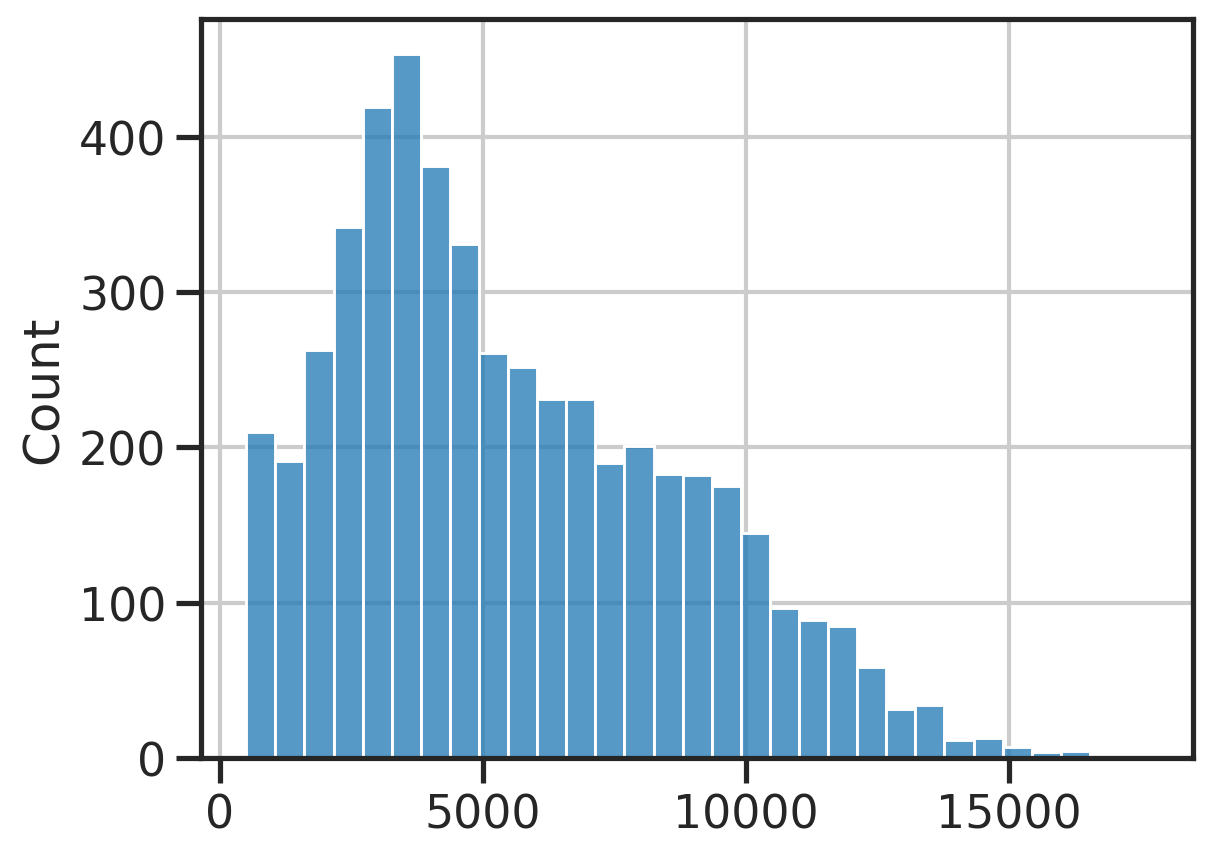

In [20]:
sns.histplot(cov)

In [21]:
ncell, ngene = adata.raw.X.shape

In [22]:
cell_cov = np.ravel(adata.raw.X.sum(axis=1))
gene_cov = np.ravel((adata.raw.X>0).sum(axis=0))/ncell

Text(0.5, 0, 'Cells')

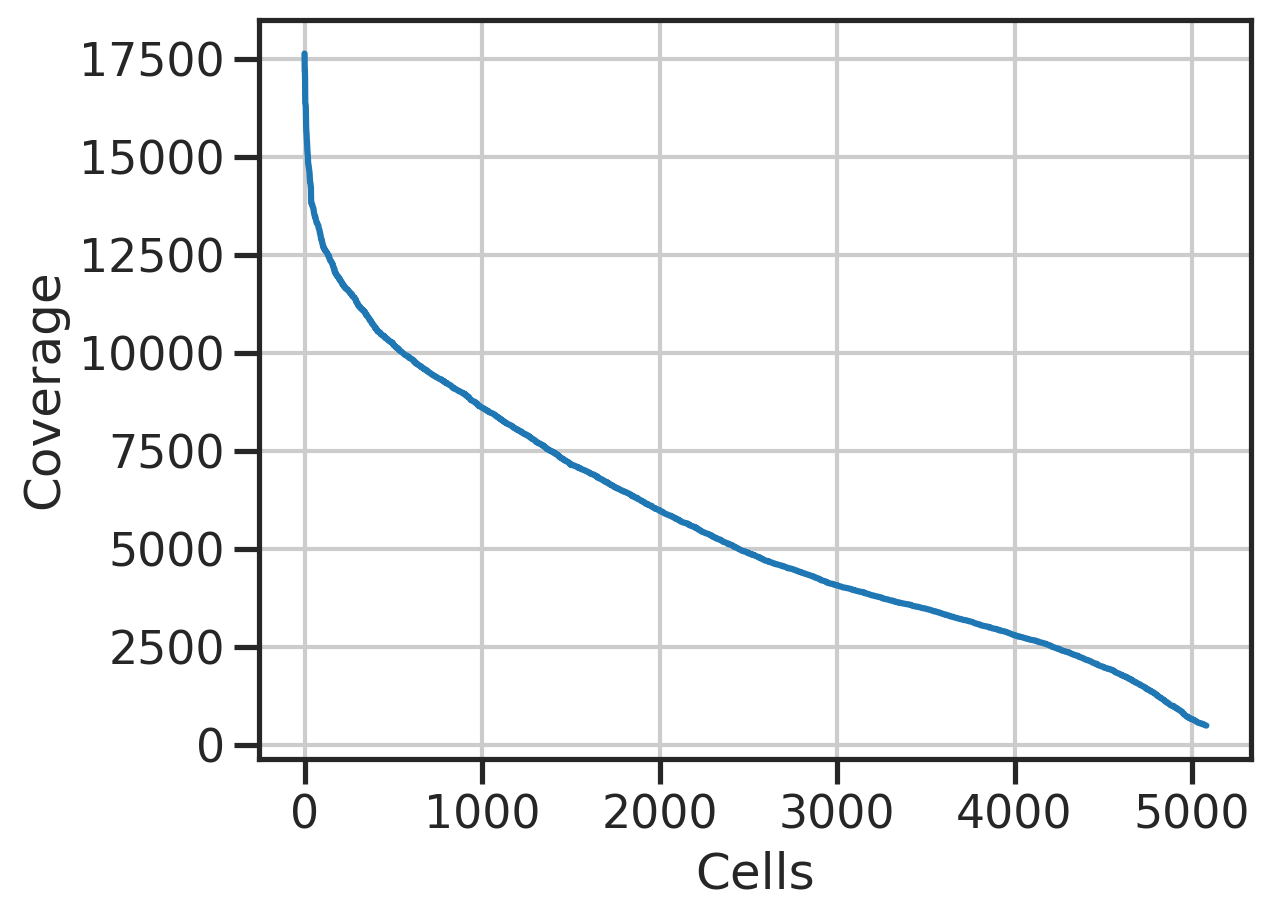

In [23]:
plt.plot(np.sort(cell_cov)[::-1])
plt.ylabel('Coverage')
plt.xlabel('Cells')

Text(0.5, 0, 'Genes')

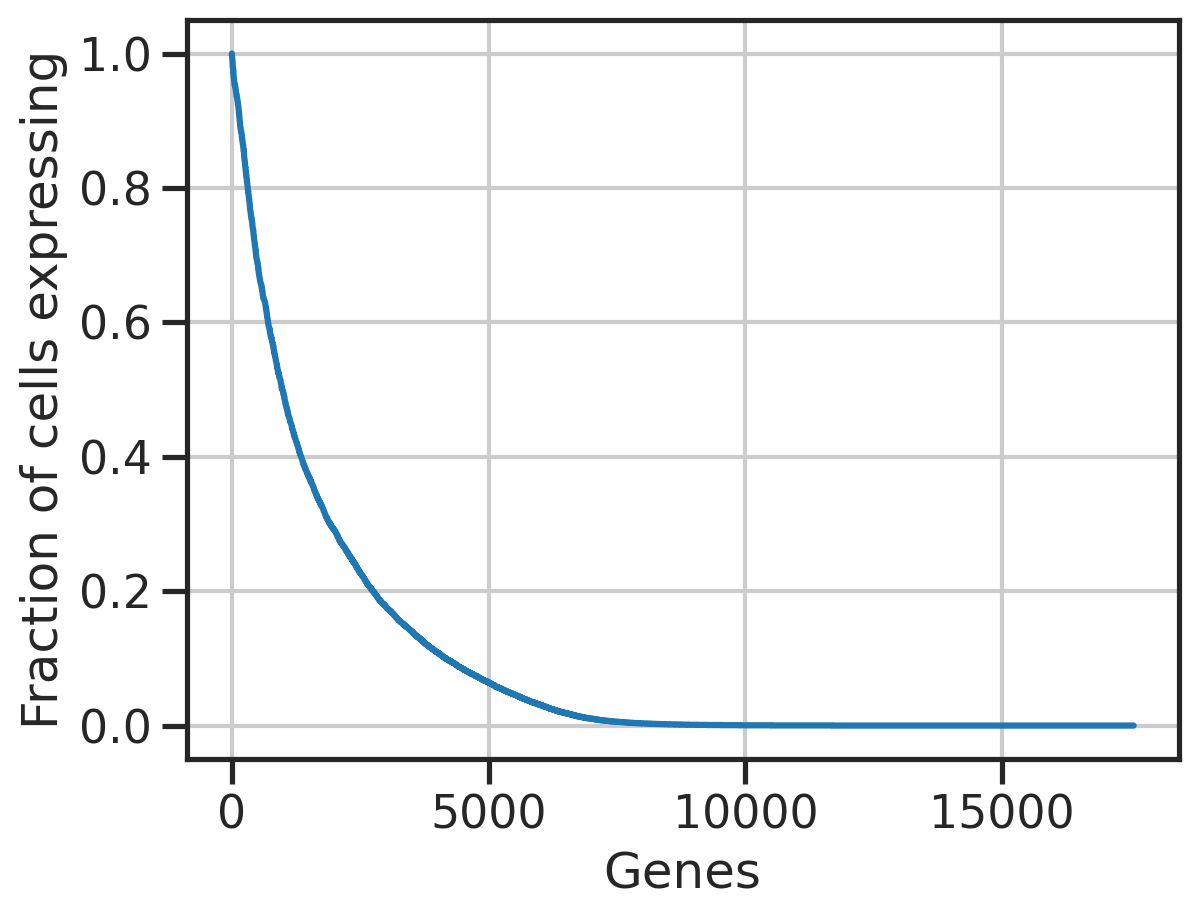

In [24]:
plt.plot(np.sort(gene_cov)[::-1])
plt.ylabel('Fraction of cells expressing')
plt.xlabel('Genes')